# Rocks vs Mines

### Importing necessary stuff

In [34]:
import numpy as np
import matplotlib.pyplot as plot
from urllib.request import urlopen
from scipy import stats
import pandas as pd

### Get data

In [35]:
rockMine = pd.read_csv(target_url, header = None, prefix = "V")

### Propability plots

In [36]:
print(rockMine.head())

       V0      V1      V2      V3      V4      V5      V6      V7      V8  \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   

       V9 ...      V51     V52     V53     V54     V55     V56     V57  \
0  0.2111 ...   0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084   
1  0.2872 ...   0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
2  0.6194 ...   0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
3  0.1264 ...   0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
4  0.4459 ...   0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   

      V58     V59  V60  
0  0.0090  0.0032    R  
1  0.0052  0.0044    R  
2  0.0095  0.0078

In [37]:
summary = rockMine.describe()
print(summary)

               V0          V1          V2          V3          V4          V5  \
count  208.000000  208.000000  208.000000  208.000000  208.000000  208.000000   
mean     0.029164    0.038437    0.043832    0.053892    0.075202    0.104570   
std      0.022991    0.032960    0.038428    0.046528    0.055552    0.059105   
min      0.001500    0.000600    0.001500    0.005800    0.006700    0.010200   
25%      0.013350    0.016450    0.018950    0.024375    0.038050    0.067025   
50%      0.022800    0.030800    0.034300    0.044050    0.062500    0.092150   
75%      0.035550    0.047950    0.057950    0.064500    0.100275    0.134125   
max      0.137100    0.233900    0.305900    0.426400    0.401000    0.382300   

               V6          V7          V8          V9     ...             V50  \
count  208.000000  208.000000  208.000000  208.000000     ...      208.000000   
mean     0.121747    0.134799    0.178003    0.208259     ...        0.016069   
std      0.061788    0.0851

Column 0:


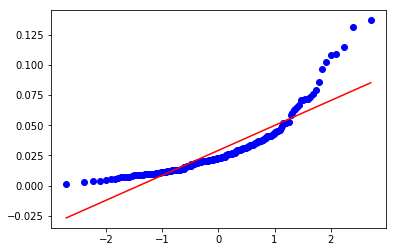

Column 1:


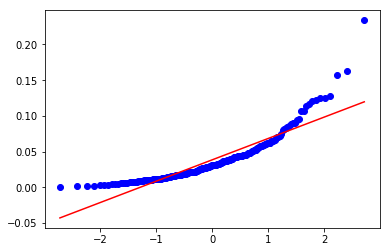

Column 2:


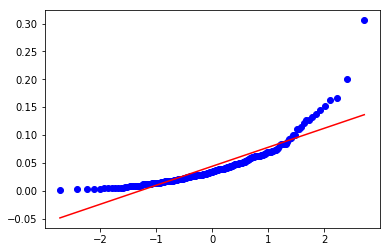

Column 3:


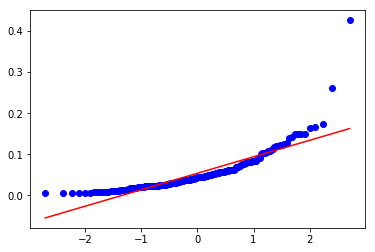

Column 4:


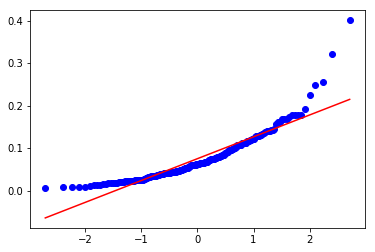

Column 5:


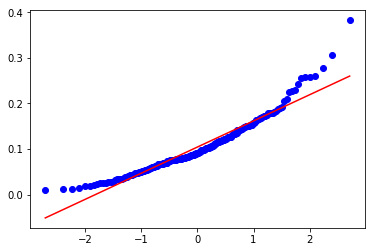

Column 6:


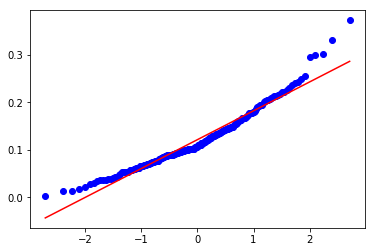

Column 7:


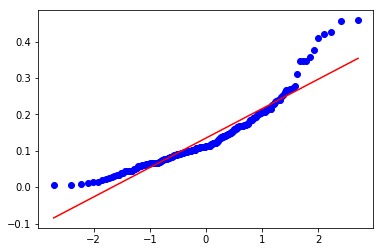

In [38]:
for col in range(len(summary)):
    stats.probplot(rockMine.iloc[:,col], dist = "norm", plot = plot)
    print("Column " + str(col) + ":")
    plot.show()


### Correlation heat map

In [39]:
corMat = pd.DataFrame(rockMine.corr())
print(corMat)

           V0        V1        V2        V3        V4        V5        V6  \
V0   1.000000  0.735896  0.571537  0.491438  0.344797  0.238921  0.260815   
V1   0.735896  1.000000  0.779916  0.606684  0.419669  0.332329  0.279040   
V2   0.571537  0.779916  1.000000  0.781786  0.546141  0.346275  0.190434   
V3   0.491438  0.606684  0.781786  1.000000  0.726943  0.352805  0.246440   
V4   0.344797  0.419669  0.546141  0.726943  1.000000  0.597053  0.335422   
V5   0.238921  0.332329  0.346275  0.352805  0.597053  1.000000  0.702889   
V6   0.260815  0.279040  0.190434  0.246440  0.335422  0.702889  1.000000   
V7   0.355523  0.334615  0.237884  0.246742  0.204006  0.471683  0.675774   
V8   0.353420  0.316733  0.252691  0.247078  0.177906  0.327578  0.470580   
V9   0.318276  0.270782  0.219637  0.237769  0.183219  0.288621  0.425448   
V10  0.344058  0.297065  0.274610  0.271881  0.231684  0.333570  0.396588   
V11  0.210861  0.194102  0.214807  0.175381  0.211657  0.344451  0.274432   

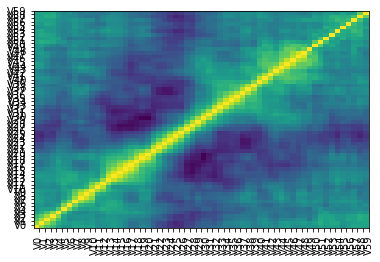

In [40]:
plot.pcolor(corMat)
plot.xticks(list(range(1, len(summary.columns) + 1)), list(summary.columns), rotation = 'vertical')
plot.yticks(list(range(1, len(summary.columns) + 1)), list(summary.columns), rotation = 'horizontal')
plot.show()